# Data Analysis Report for SussexBudgetProduction

This report was created through analysing historical data from the IMDB database to suggest a film genre that would generate an adequate margin of profit and benefit Sussex Budget Production House.

Candidate number ####

In [1]:
# Data File to be imported

myfile='movie_metadata.csv'

#standard imports for when working with pandas
import numpy as np

#standard imports for when working with seaborn to help us with the graphs
import seaborn as sns

#matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

myfile = 'movie_metadata.csv'

#read the movie metadata file into a dataframe in pandas.
df = pd.read_csv(myfile,index_col=None)

# Examine the dataframe

Analyze the dataframe's columns, shapes, and variable types.

In [2]:
# display dataframe
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [3]:
#Review the column-by-column dataframe information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [4]:
#Use 'describe()' to get a summary of the dataframe

df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


# Data Cleaning

In [5]:
# comparing values for duplicate values

df[df.duplicated()]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
137,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,...,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000
187,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,...,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000
204,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
303,Color,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,...,186.0,English,USA,PG,150000000.0,2015.0,548.0,5.8,2.35,24000
389,Color,Josh Trank,369.0,100.0,128.0,78.0,Reg E. Cathey,596.0,56114221.0,Action|Adventure|Sci-Fi,...,695.0,English,USA,PG-13,120000000.0,2015.0,360.0,4.3,2.35,41000
395,Color,Rob Cohen,187.0,106.0,357.0,4000.0,Vin Diesel,23000.0,144512310.0,Action|Crime|Thriller,...,988.0,English,USA,PG-13,38000000.0,2001.0,14000.0,6.7,2.35,14000
590,Color,Brett Ratner,245.0,101.0,420.0,467.0,Rufus Sewell,12000.0,72660029.0,Action|Adventure,...,269.0,English,USA,PG-13,100000000.0,2014.0,3000.0,6.0,2.35,21000
656,Color,Paul Verhoeven,196.0,113.0,719.0,217.0,Rachel Ticotin,605.0,119412921.0,Action|Sci-Fi,...,391.0,English,USA,R,65000000.0,1990.0,308.0,7.5,1.85,0
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
1220,Color,Angelina Jolie Pitt,322.0,137.0,11000.0,465.0,Jack O'Connell,769.0,115603980.0,Biography|Drama|Sport|War,...,351.0,English,USA,PG-13,65000000.0,2014.0,698.0,7.2,2.35,35000


In [6]:
# Removing all redundant values

df=df.drop_duplicates()
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [7]:
#Printing all the column names
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [8]:
# Remove undesirable columns which is not required for analysis

columns = ['color',
         'num_critic_for_reviews',
         'duration',         
         'director_facebook_likes',
         'actor_3_facebook_likes',
         'actor_1_facebook_likes',
         'actor_2_name',
         'num_voted_users',
         'cast_total_facebook_likes',
         'actor_3_name',
         'facenumber_in_poster',
         'plot_keywords',
         'movie_imdb_link',
         'num_user_for_reviews',
         'content_rating',
         'actor_2_facebook_likes',
         'aspect_ratio',
         'movie_facebook_likes']

df = df.drop(columns, axis = 1)
df

,director_name,gross,genres,actor_1_name,movie_title,language,country,budget,title_year,imdb_score
0,James Cameron,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,English,USA,237000000.0,2009.0,7.9
1,Gore Verbinski,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007.0,7.1
2,Sam Mendes,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,English,UK,245000000.0,2015.0,6.8
3,Christopher Nolan,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,English,USA,250000000.0,2012.0,8.5
4,Doug Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,7.1
...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,English,Canada,NaN,2013.0,7.7
5039,NaN,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,English,USA,NaN,NaN,7.5
5040,Benjamin Roberds,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,English,USA,1400.0,2013.0,6.3
5041,Daniel Hsia,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,English,USA,NaN,2012.0,6.3


In [9]:
# Examine the data set. There are now just 10 columns visible.

df.shape

(4998, 10)

In [10]:
# Get the percentages by dividing the sum acquired previously by the total length, multiplying it by 100 and rounding it off to
# two decimal places

round(100*(df.isnull().sum()/len(df.index)), 2)

director_name     2.06
gross            17.49
genres            0.00
actor_1_name      0.14
movie_title       0.00
language          0.28
country           0.10
budget            9.74
title_year        2.14
imdb_score        0.00
dtype: float64

In [11]:
#Looking into null values in both gross and budget

df[df.gross.isnull() | df.budget.isnull()]

,director_name,gross,genres,actor_1_name,movie_title,language,country,budget,title_year,imdb_score
4,Doug Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,7.1
55,Peter Sohn,123070338.0,Adventure|Animation|Comedy|Family|Fantasy,A.J. Buckley,The Good Dinosaur,English,USA,NaN,2015.0,6.8
84,Roland Joffé,NaN,Action|Adventure|Romance|Sci-Fi,Tamsin Egerton,The Lovers,English,Belgium,NaN,2015.0,4.5
98,Hideaki Anno,NaN,Action|Adventure|Drama|Horror|Sci-Fi,Mark Chinnery,Godzilla Resurgence,Japanese,Japan,NaN,2016.0,8.2
177,NaN,NaN,Action|Crime|Drama|Mystery|Thriller,Don Johnson,Miami Vice,English,USA,1500000.0,NaN,7.5
...,...,...,...,...,...,...,...,...,...,...
5036,Anthony Vallone,NaN,Crime|Drama,Richard Jewell,The Mongol King,English,USA,3250.0,2005.0,7.8
5038,Scott Smith,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,English,Canada,NaN,2013.0,7.7
5039,NaN,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,English,USA,NaN,NaN,7.5
5040,Benjamin Roberds,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,English,USA,1400.0,2013.0,6.3


Since, both budget and gross having null values in the database and can not predict/fill. So, we are droping all null values in budget and gross

In [12]:
#Removing all the null values in budget and gross

nan_indexes = df[df.budget.isnull() | df.gross.isnull()].index
df.drop(nan_indexes,inplace=True)
df.reset_index(drop=True,inplace=True)
df

,director_name,gross,genres,actor_1_name,movie_title,language,country,budget,title_year,imdb_score
0,James Cameron,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,English,USA,237000000.0,2009.0,7.9
1,Gore Verbinski,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007.0,7.1
2,Sam Mendes,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,English,UK,245000000.0,2015.0,6.8
3,Christopher Nolan,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,English,USA,250000000.0,2012.0,8.5
4,Andrew Stanton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,English,USA,263700000.0,2012.0,6.6
...,...,...,...,...,...,...,...,...,...,...
3852,Shane Carruth,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,English,USA,7000.0,2004.0,7.0
3853,Neill Dela Llana,70071.0,Thriller,Ian Gamazon,Cavite,English,Philippines,7000.0,2005.0,6.3
3854,Robert Rodriguez,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,Spanish,USA,7000.0,1992.0,6.9
3855,Edward Burns,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,English,USA,9000.0,2011.0,6.4


**Fill in NaN values**

Some NaN values may have been visible to you in the language column. Upon closer inspection, you'll discover that "English" can be used in lieu of any missing value.

In [13]:
#Examine the language column in the data set.

df['language'].describe()

count        3853
unique         37
top       English
freq         3674
Name: language, dtype: object

In [14]:
# Considering the majority of movies are in English, "English" is the most appropriate one to enter for the NaN values.

df.loc[pd.isnull(df['language']), ['language']] = 'English'
df

,director_name,gross,genres,actor_1_name,movie_title,language,country,budget,title_year,imdb_score
0,James Cameron,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,English,USA,237000000.0,2009.0,7.9
1,Gore Verbinski,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007.0,7.1
2,Sam Mendes,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,English,UK,245000000.0,2015.0,6.8
3,Christopher Nolan,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,English,USA,250000000.0,2012.0,8.5
4,Andrew Stanton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,English,USA,263700000.0,2012.0,6.6
...,...,...,...,...,...,...,...,...,...,...
3852,Shane Carruth,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,English,USA,7000.0,2004.0,7.0
3853,Neill Dela Llana,70071.0,Thriller,Ian Gamazon,Cavite,English,Philippines,7000.0,2005.0,6.3
3854,Robert Rodriguez,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,Spanish,USA,7000.0,1992.0,6.9
3855,Edward Burns,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,English,USA,9000.0,2011.0,6.4


In [15]:
# Let's look again at the percentages of Null values again

round(100*(df.isnull().sum()/len(df.index)), 2)

director_name    0.00
gross            0.00
genres           0.00
actor_1_name     0.08
movie_title      0.00
language         0.00
country          0.00
budget           0.00
title_year       0.00
imdb_score       0.00
dtype: float64

In [16]:
# Compute the number of retained rows using 'len()' function
# Get the percentage of retained rows by dividing the current number of rows with initial number of rows

print(len(df.index))
print(len(df.index)/5043)

3857
0.7648225262740432


# Explanatory Data Analysis (EDA)

In [17]:
# Change the budget and gross units to millions.

df['budget_in_million'] = df['budget']/1000000
df['gross_in_million'] = df['gross']/1000000
df

,director_name,gross,genres,actor_1_name,movie_title,language,country,budget,title_year,imdb_score,budget_in_million,gross_in_million
0,James Cameron,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,English,USA,237000000.0,2009.0,7.9,237.0000,760.505847
1,Gore Verbinski,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007.0,7.1,300.0000,309.404152
2,Sam Mendes,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,English,UK,245000000.0,2015.0,6.8,245.0000,200.074175
3,Christopher Nolan,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,English,USA,250000000.0,2012.0,8.5,250.0000,448.130642
4,Andrew Stanton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,English,USA,263700000.0,2012.0,6.6,263.7000,73.058679
...,...,...,...,...,...,...,...,...,...,...,...,...
3852,Shane Carruth,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,English,USA,7000.0,2004.0,7.0,0.0070,0.424760
3853,Neill Dela Llana,70071.0,Thriller,Ian Gamazon,Cavite,English,Philippines,7000.0,2005.0,6.3,0.0070,0.070071
3854,Robert Rodriguez,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,Spanish,USA,7000.0,1992.0,6.9,0.0070,2.040920
3855,Edward Burns,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,English,USA,9000.0,2011.0,6.4,0.0090,0.004584


In [18]:
# Adding a new column name profit percentage to get total profile based on budget and gross
# Rounding the value with 2 decimal place to make it short

df['profit_percentage'] = round(((df['gross'] - df['budget']) / df['gross']) * 100,2)
df

,director_name,gross,genres,actor_1_name,movie_title,language,country,budget,title_year,imdb_score,budget_in_million,gross_in_million,profit_percentage
0,James Cameron,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,English,USA,237000000.0,2009.0,7.9,237.0000,760.505847,68.84
1,Gore Verbinski,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007.0,7.1,300.0000,309.404152,3.04
2,Sam Mendes,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,English,UK,245000000.0,2015.0,6.8,245.0000,200.074175,-22.45
3,Christopher Nolan,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,English,USA,250000000.0,2012.0,8.5,250.0000,448.130642,44.21
4,Andrew Stanton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,English,USA,263700000.0,2012.0,6.6,263.7000,73.058679,-260.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3852,Shane Carruth,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,English,USA,7000.0,2004.0,7.0,0.0070,0.424760,98.35
3853,Neill Dela Llana,70071.0,Thriller,Ian Gamazon,Cavite,English,Philippines,7000.0,2005.0,6.3,0.0070,0.070071,90.01
3854,Robert Rodriguez,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,Spanish,USA,7000.0,1992.0,6.9,0.0070,2.040920,99.66
3855,Edward Burns,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,English,USA,9000.0,2011.0,6.4,0.0090,0.004584,-96.34


In [19]:
# Sort the dataframe in descending order to profit percentage in data set

df = df.sort_values(by = 'profit_percentage', ascending = False)
df

,director_name,gross,genres,actor_1_name,movie_title,language,country,budget,title_year,imdb_score,budget_in_million,gross_in_million,profit_percentage
3756,Oren Peli,107917283.0,Horror,Micah Sloat,Paranormal Activity,English,USA,1.500000e+04,2007.0,6.3,0.015000,107.917283,99.99
3709,Daniel Myrick,140530114.0,Horror,Heather Donahue,The Blair Witch Project,English,USA,6.000000e+04,1999.0,6.4,0.060000,140.530114,99.96
3760,Jonathan Caouette,592014.0,Biography|Documentary,Greg Ayres,Tarnation,English,USA,2.180000e+02,2003.0,7.2,0.000218,0.592014,99.96
3836,Edward Burns,10246600.0,Comedy|Drama|Romance,Shari Albert,The Brothers McMullen,English,USA,2.500000e+04,1995.0,6.6,0.025000,10.246600,99.76
3819,Tobe Hooper,30859000.0,Horror|Thriller,Gunnar Hansen,The Texas Chain Saw Massacre,English,USA,8.353200e+04,1974.0,7.5,0.083532,30.859000,99.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,Jeremy Degruson,4091.0,Adventure|Animation|Comedy|Family|Fantasy,Kyle Hebert,Thunder and the House of Magic,English,Belgium,3.400000e+07,2013.0,6.3,34.000000,0.004091,-830992.64
313,Yimou Zhang,9213.0,Drama|History|Romance|War,Christian Bale,The Flowers of War,Mandarin,China,9.400000e+07,2011.0,7.6,94.000000,0.009213,-1020197.41
2693,Lajos Koltai,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,Hungarian,Hungary,2.500000e+09,2005.0,7.1,2500.000000,0.195888,-1276139.48
3282,Chan-wook Park,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,Korean,South Korea,4.200000e+09,2005.0,7.7,4200.000000,0.211667,-1984148.84


In [20]:
# Use the 'drop duplicates' method to remove duplicate values. The "subset" argument is set to "None" since all 
# the columns for duplicate rows must be removed. The 'keep = first' specifies that the first duplicate row should be kept, 
# and the 'inplace = True' conducts the operation on the dataframe while it is still in place.

df.drop_duplicates(subset = None, keep = 'first', inplace = True)
df

,director_name,gross,genres,actor_1_name,movie_title,language,country,budget,title_year,imdb_score,budget_in_million,gross_in_million,profit_percentage
3756,Oren Peli,107917283.0,Horror,Micah Sloat,Paranormal Activity,English,USA,1.500000e+04,2007.0,6.3,0.015000,107.917283,99.99
3709,Daniel Myrick,140530114.0,Horror,Heather Donahue,The Blair Witch Project,English,USA,6.000000e+04,1999.0,6.4,0.060000,140.530114,99.96
3760,Jonathan Caouette,592014.0,Biography|Documentary,Greg Ayres,Tarnation,English,USA,2.180000e+02,2003.0,7.2,0.000218,0.592014,99.96
3836,Edward Burns,10246600.0,Comedy|Drama|Romance,Shari Albert,The Brothers McMullen,English,USA,2.500000e+04,1995.0,6.6,0.025000,10.246600,99.76
3819,Tobe Hooper,30859000.0,Horror|Thriller,Gunnar Hansen,The Texas Chain Saw Massacre,English,USA,8.353200e+04,1974.0,7.5,0.083532,30.859000,99.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,Jeremy Degruson,4091.0,Adventure|Animation|Comedy|Family|Fantasy,Kyle Hebert,Thunder and the House of Magic,English,Belgium,3.400000e+07,2013.0,6.3,34.000000,0.004091,-830992.64
313,Yimou Zhang,9213.0,Drama|History|Romance|War,Christian Bale,The Flowers of War,Mandarin,China,9.400000e+07,2011.0,7.6,94.000000,0.009213,-1020197.41
2693,Lajos Koltai,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,Hungarian,Hungary,2.500000e+09,2005.0,7.1,2500.000000,0.195888,-1276139.48
3282,Chan-wook Park,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,Korean,South Korea,4.200000e+09,2005.0,7.7,4200.000000,0.211667,-1984148.84


In [21]:
# Get the top 10 profitable films

top10_profitable_movies = df.iloc[:10, ]
top10_profitable_movies

,director_name,gross,genres,actor_1_name,movie_title,language,country,budget,title_year,imdb_score,budget_in_million,gross_in_million,profit_percentage
3756,Oren Peli,107917283.0,Horror,Micah Sloat,Paranormal Activity,English,USA,15000.0,2007.0,6.3,0.015000,107.917283,99.99
3709,Daniel Myrick,140530114.0,Horror,Heather Donahue,The Blair Witch Project,English,USA,60000.0,1999.0,6.4,0.060000,140.530114,99.96
3760,Jonathan Caouette,592014.0,Biography|Documentary,Greg Ayres,Tarnation,English,USA,218.0,2003.0,7.2,0.000218,0.592014,99.96
3836,Edward Burns,10246600.0,Comedy|Drama|Romance,Shari Albert,The Brothers McMullen,English,USA,25000.0,1995.0,6.6,0.025000,10.246600,99.76
3819,Tobe Hooper,30859000.0,Horror|Thriller,Gunnar Hansen,The Texas Chain Saw Massacre,English,USA,83532.0,1974.0,7.5,0.083532,30.859000,99.73
3854,Robert Rodriguez,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,Spanish,USA,7000.0,1992.0,6.9,0.007000,2.040920,99.66
3825,Travis Cluff,22757819.0,Horror|Thriller,Pfeifer Brown,The Gallows,English,USA,100000.0,2015.0,4.2,0.100000,22.757819,99.56
3833,Morgan Spurlock,11529368.0,Comedy|Documentary|Drama,Chemeeka Walker,Super Size Me,English,USA,65000.0,2004.0,7.3,0.065000,11.529368,99.44
3770,John Carpenter,47000000.0,Horror|Thriller,Jamie Lee Curtis,Halloween,English,USA,300000.0,1978.0,7.9,0.300000,47.000000,99.36
3693,George Lucas,115000000.0,Comedy|Drama|Music,Harrison Ford,American Graffiti,English,USA,777000.0,1973.0,7.5,0.777000,115.000000,99.32


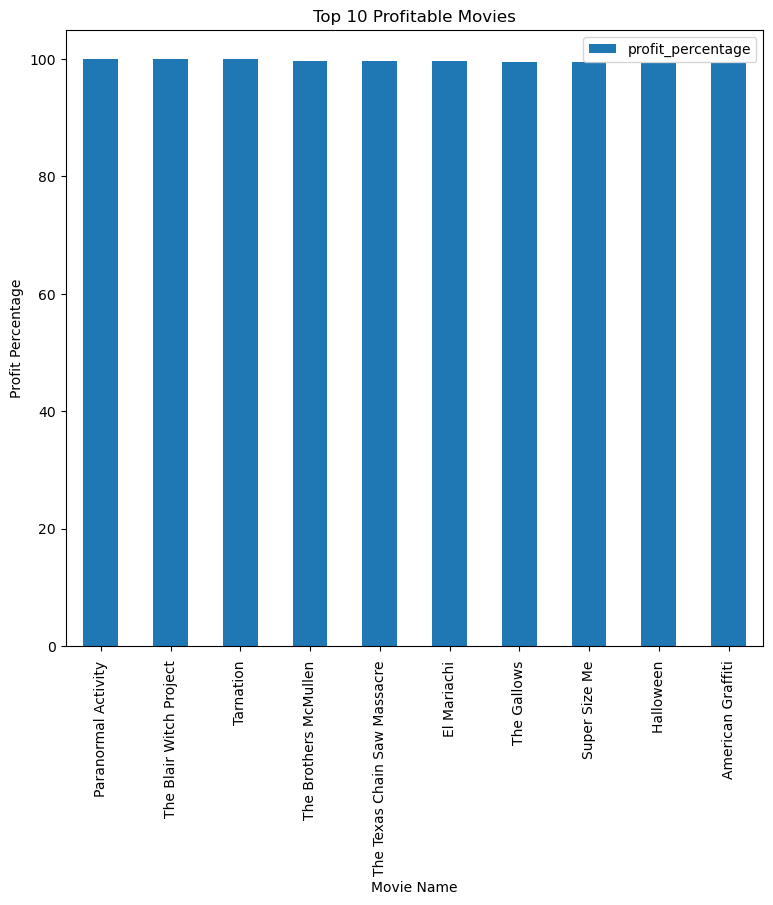

In [22]:
# Plotting a graph for first 10 profitable movies

top10_profitable_movies.plot(x="movie_title", y=["profit_percentage"], kind="bar", figsize=(9, 8))

plt.title("Top 10 Profitable Movies") #setting the title of the plot
plt.xlabel('Movie Name') # setting the x label of the plot
plt.ylabel('Profit Percentage') # setting the y label of the plot
plt.show()

At the moment, based on the ten most profitable movie genres. To figure out the most profitable genre, I take an average of the budget and the gross.

In [23]:
# getting unique genre of the top profitable movies
genres = np.unique(top10_profitable_movies.genres)

# printing average of budget and gross based on genre in millions
for genre in genres:
    gross_mean = df[df.genres == genre]["gross_in_million"].mean()
    budget_mean = df[df.genres == genre]["budget_in_million"].mean()
    print(f"The genre {genre} having budget mean {budget_mean:.2f} and gross mean {gross_mean:.2f} in millions")

The genre Action|Crime|Drama|Romance|Thriller having budget mean 17.83 and gross mean 22.24 in millions
The genre Biography|Documentary having budget mean 0.00 and gross mean 0.59 in millions
The genre Comedy|Documentary|Drama having budget mean 0.07 and gross mean 11.53 in millions
The genre Comedy|Drama|Music having budget mean 11.45 and gross mean 27.43 in millions
The genre Comedy|Drama|Romance having budget mean 22.11 and gross mean 32.47 in millions
The genre Horror having budget mean 11.85 and gross mean 39.89 in millions
The genre Horror|Thriller having budget mean 11.16 and gross mean 25.41 in millions


In [24]:
# printing median of budget and gross based on genre in millions

for genre in genres:
    gross_median = df[df.genres == genre]["gross_in_million"].median()
    budget_median = df[df.genres == genre]["budget_in_million"].median()
    print(f"The genre {genre} having budget median {budget_median:.2f} and gross median {gross_median:.2f} in millions")

The genre Action|Crime|Drama|Romance|Thriller having budget median 14.00 and gross median 17.24 in millions
The genre Biography|Documentary having budget median 0.00 and gross median 0.59 in millions
The genre Comedy|Documentary|Drama having budget median 0.07 and gross median 11.53 in millions
The genre Comedy|Drama|Music having budget median 10.00 and gross median 9.00 in millions
The genre Comedy|Drama|Romance having budget median 16.00 and gross median 18.00 in millions
The genre Horror having budget median 8.00 and gross median 32.05 in millions
The genre Horror|Thriller having budget median 8.45 and gross median 22.92 in millions


It is evident from the average and median that horror films are profitable. However, it depends entirely on the top ten profitable movies genre. Let's perform further research before drawing any conclusions.

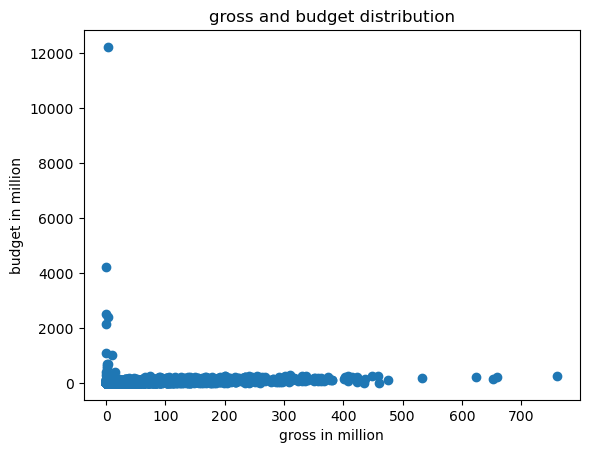

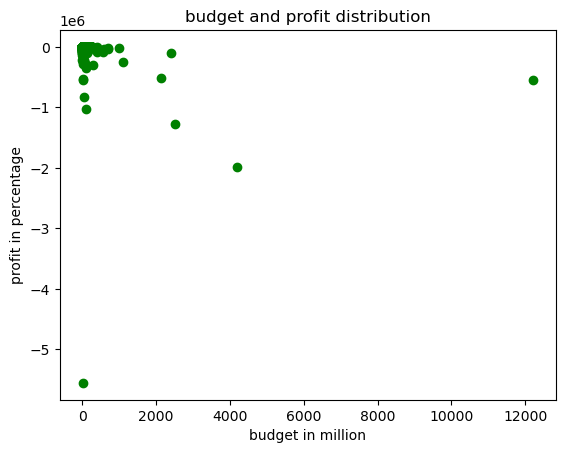

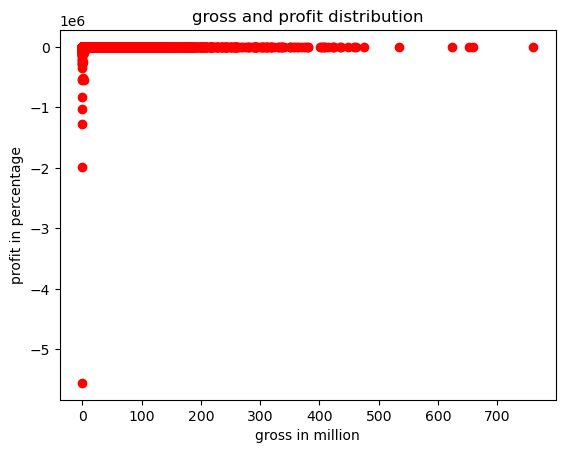

In [25]:
#By creating a scatter plot between these features, we can see how the gross, budget, and profit relate to one another.

plt.scatter(df['gross_in_million'],df['budget_in_million']) # plot between gross and budget
plt.title("gross and budget distribution") #setting the title of the plot
plt.xlabel('gross in million')
plt.ylabel('budget in million')
plt.show()
plt.scatter(df['budget_in_million'],df['profit_percentage'] , c = 'green') # plot between budget and profit
plt.title("budget and profit distribution") #setting the title of the plot
plt.xlabel('budget in million')
plt.ylabel('profit in percentage')
plt.show()
plt.scatter(df['gross_in_million'],df['profit_percentage'], c= 'red' ) # plot between gross and profit
plt.title("gross and profit distribution") #setting the title of the plot
plt.xlabel('gross in million')
plt.ylabel('profit in percentage')
plt.show()


In the above drawn graph, we can conclude that -
1. Budget is unrelated to the gross
2. As the budget increased, profits doesn't increases
3. Profit and gross revenue are positively correlated.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy|Drama|Romance'),
  Text(2, 0, 'Comedy|Drama'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Comedy|Romance'),
  Text(5, 0, 'Drama|Romance'),
  Text(6, 0, 'Crime|Drama|Thriller'),
  Text(7, 0, 'Action|Crime|Thriller'),
  Text(8, 0, 'Action|Crime|Drama|Thriller'),
  Text(9, 0, 'Action|Adventure|Sci-Fi'),
  Text(10, 0, 'Comedy|Crime'),
  Text(11, 0, 'Action|Adventure|Thriller'),
  Text(12, 0, 'Crime|Drama'),
  Text(13, 0, 'Horror'),
  Text(14, 0, 'Crime|Drama|Mystery|Thriller'),
  Text(15, 0, 'Drama|Thriller'),
  Text(16, 0, 'Action|Adventure|Sci-Fi|Thriller'),
  Text(17, 0, 'Horror|Thriller'),
  Text(18, 0, 'Horror|Mystery|Thriller'),
  Text(19, 0, 'Biography|Drama'),
  Text(20, 0, 'Drama|Mystery|Thriller'),
  Text(21, 0, 'Adventure|Animation|Comedy|Family|Fantasy'),
  Text(22, 0, 'Action|Comedy|Crime'),
  Text(

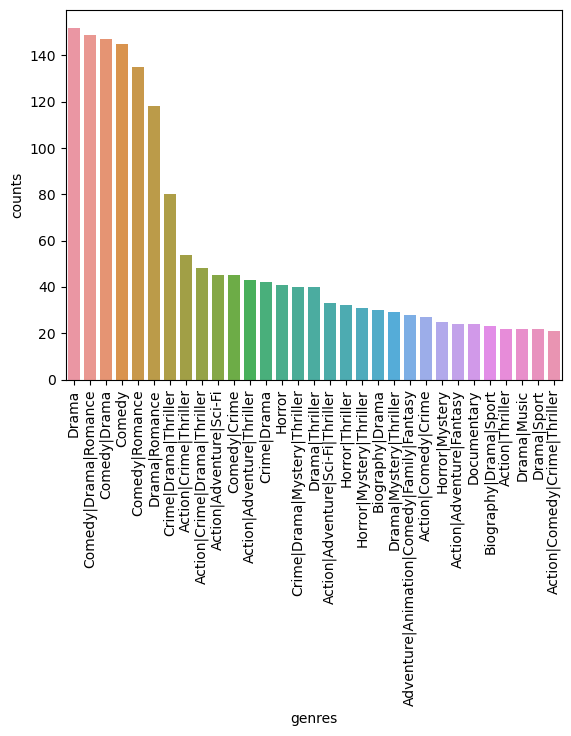

In [26]:
# drawing the bar plot for the genre column
# grouping the dataframe by "genres" column and then counting each category and displaying the first 30 genres 
# with the largest count

splitGenres = df.groupby("genres")['genres'].count().nlargest(31).reset_index(name='counts')
sns.barplot(data=splitGenres, x='genres', y = 'counts')

plt.xticks(rotation=90)

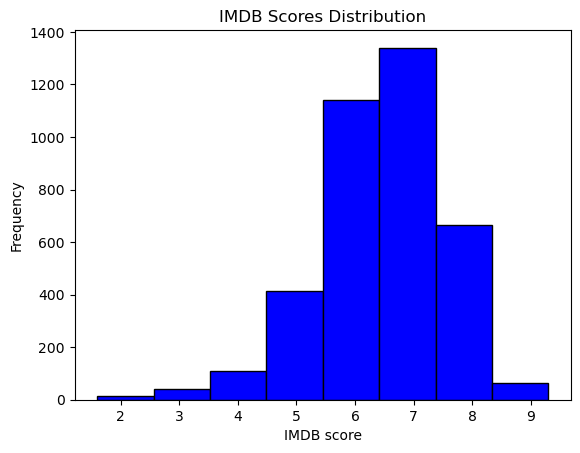

In [27]:
# find out the frequency of IMDB scores

plt.title("IMDB Scores Distribution") #setting the title of the plot
plt.xlabel('IMDB score') # setting the x label of the plot
plt.ylabel('Frequency') # setting the y label of the plot
plt.hist(df['imdb_score'], color="blue", edgecolor='black', bins=8); # plotting the points on the histogram

<Axes: title={'center': 'gross'}, xlabel='[country]'>

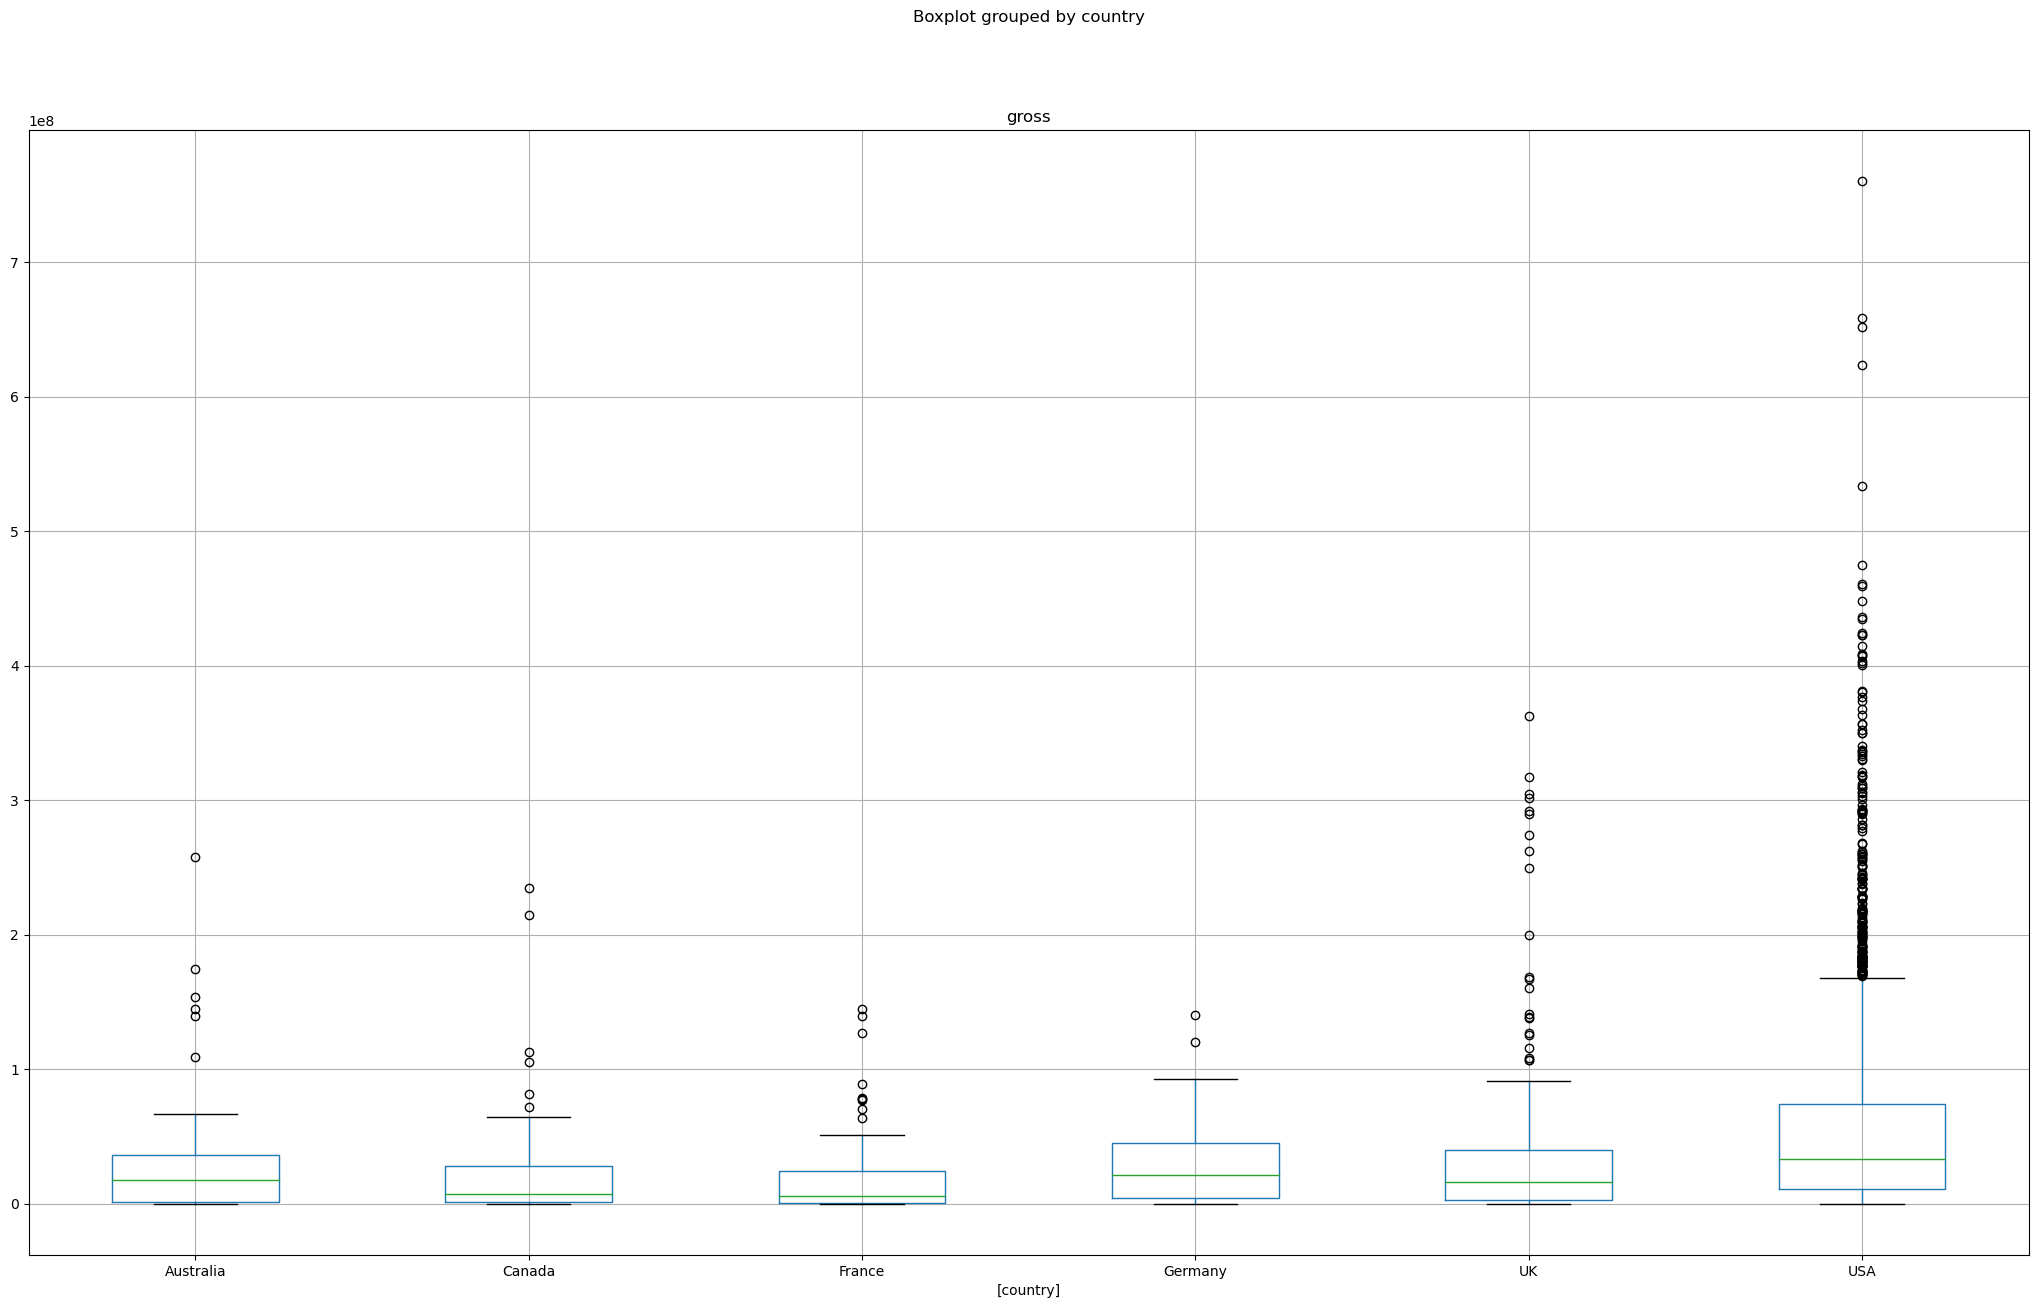

In [28]:
# Creating the boxplot of countries who have more than 30 samples in the dataset

n=30
country_budgets = df.loc[:,['country','budget']].groupby('country')

# create a new the data frame that is indexed by country and provides budget counts (the total number of films).
counts = country_budgets.count().reset_index('country')
# filter this to those where the count is more than n.
bigcounts = counts[counts.budget>n]['country']

#calculate means and stds and store the ones where the counts > n
means = country_budgets.mean()[country_budgets.count().budget > n]
stds = country_budgets.std()[country_budgets.count().budget > n]

#plot the filtered data via boxplots to inspect biggest countries
bigcountries_df = df[df.country.isin(bigcounts)].loc[:,['country','gross']]
bigcountries_df.boxplot(by='country',figsize=(25,15))

I find the director of the film to be very important since we all see films through the unique perspective of the filmmaker. To find out which movie has made the most money to date, I'm going to group the filmmakers and the genres.

In [29]:
# grouping with director and geners to go further into analysis
directorseries = df.groupby(['director_name','genres'])[['imdb_score','budget_in_million','gross_in_million','profit_percentage']].mean()
# As per the IMDB graph, most of the movies lies between 6 to 8. 
# Thus, I'm thinking that an IMDB rating of six or more should be the minimum.
min_imdb_score = 6
# The allotted budget for the problem set is 1.5 million GBP.
max_budget = 1.5

# Gross should be more than 0
top_rated_director = directorseries[directorseries['gross_in_million'] > 0.0]

# Applying the condition for Budget
top_rated_director = directorseries[(directorseries['budget_in_million']) <= max_budget]

# Budget should be more than 0
top_rated_director_wz = top_rated_director[(top_rated_director['budget_in_million']) > 0.0]

# Arranging the data set in terms of maximum revenue generated by director in a particular genre
top_rated_director_wz = top_rated_director_wz.sort_values('gross_in_million', ascending=False)

# Applying the condition for IMDB
top_rated_director_imdb = top_rated_director_wz[top_rated_director_wz['imdb_score'] > min_imdb_score]


#print the result for inspection
top_rated_director_imdb.head(10)

,,imdb_score,budget_in_million,gross_in_million,profit_percentage
director_name,genres,,,,
Daniel Myrick,Horror,6.4,0.060000,140.530114,99.96
John G. Avildsen,Drama|Sport,8.1,0.960000,117.235247,99.18
George Lucas,Comedy|Drama|Music,7.5,0.777000,115.000000,99.32
Oren Peli,Horror,6.3,0.015000,107.917283,99.99
James Wan,Fantasy|Horror|Mystery|Thriller,6.8,1.500000,53.991137,97.22
John Carpenter,Horror|Thriller,7.9,0.300000,47.000000,99.36
Jared Hess,Comedy,6.9,0.400000,44.540956,99.10
Joe Camp,Adventure|Family|Romance,6.1,0.500000,39.552600,98.74
Alex Kendrick,Drama|Romance,6.5,0.500000,33.451479,98.51


The horror genre appears to be the most popular, so let's see a list of directors who primarily work in this genre.

In [30]:
# get the list of horror genre
horrorseries_test = df[df['genres'].str.contains('Horror',case=False)]

# Gross should be more than 0
horrorseries_ds1_test = horrorseries_test[horrorseries_test['gross_in_million'] > 0.0]

# Applying the condition for Budget
horrorseries_ds1_test = horrorseries_test[(horrorseries_test['budget_in_million']) <= max_budget]

# Budget should be more than 0
horrorseries_ds2_test = horrorseries_ds1_test[(horrorseries_ds1_test['budget_in_million']) > 0.0]

# Arranging the data set in terms of maximum revenue generated by director in a particular genre
horrorseries_ds3_test = horrorseries_ds2_test.sort_values('gross_in_million', ascending=False)

# Applying the condition for IMDB
horrorseries_ds4_test = horrorseries_ds3_test[horrorseries_ds3_test['imdb_score'] > min_imdb_score]


horrorseries_ds4_test.reset_index(drop=True,inplace=True)
horrorseries_ds4_test

,director_name,gross,genres,actor_1_name,movie_title,language,country,budget,title_year,imdb_score,budget_in_million,gross_in_million,profit_percentage
0,Daniel Myrick,140530114.0,Horror,Heather Donahue,The Blair Witch Project,English,USA,60000.0,1999.0,6.4,0.060000,140.530114,99.96
1,Oren Peli,107917283.0,Horror,Micah Sloat,Paranormal Activity,English,USA,15000.0,2007.0,6.3,0.015000,107.917283,99.99
2,James Wan,55153403.0,Horror|Mystery|Thriller,Michael Emerson,Saw,English,USA,1200000.0,2004.0,7.7,1.200000,55.153403,97.82
3,James Wan,53991137.0,Fantasy|Horror|Mystery|Thriller,Lin Shaye,Insidious,English,USA,1500000.0,2010.0,6.8,1.500000,53.991137,97.22
4,John Carpenter,47000000.0,Horror|Thriller,Jamie Lee Curtis,Halloween,English,USA,300000.0,1978.0,7.9,0.300000,47.000000,99.36
5,Alfred Hitchcock,32000000.0,Horror|Mystery|Thriller,Janet Leigh,Psycho,English,USA,806947.0,1960.0,8.5,0.806947,32.000000,97.48
6,Tobe Hooper,30859000.0,Horror|Thriller,Gunnar Hansen,The Texas Chain Saw Massacre,English,USA,83532.0,1974.0,7.5,0.083532,30.859000,99.73
7,John Carpenter,21378000.0,Fantasy|Horror,Jamie Lee Curtis,The Fog,English,USA,1000000.0,1980.0,6.8,1.000000,21.378000,95.32
8,Steve Miner,19100000.0,Horror|Mystery|Thriller,Betsy Palmer,Friday the 13th Part 2,English,USA,1250000.0,1981.0,6.1,1.250000,19.100000,93.46
9,Joe Dante,17986000.0,Horror,Patrick Macnee,The Howling,English,USA,1000000.0,1981.0,6.6,1.000000,17.986000,94.44


# Hypothesis Testing

**If** horror movies make higher profit, **then** average profit will be greater for horror movies.

**H0**  : Average profit for horror movies are same as average of other genre **U1** - **U2** **=** **0**

**H1** : Average profit for horror movies are greater than average of other genre **U1** - **U2 > 0**

In this instance, we test our hypothesis for 2 groups,df_final1['profit'] and df_final2['profit']

In this case, the sample size is too small to do a z-test, so we will use a **t-test**. Furthermore, we are unable to perform the student's t-test since we cannot assume the same variance because the sample sizes of the two groups we are examining are different. 
**Welch's t-test** will be used.

In [34]:
#Create a new column named profit that holds the difference between the gross and budget columns.
df['profit'] = df['gross'] - df['budget']

# Given that our budget has a ceiling of 1,500,000 GBP,
#Let's now allocate the current budget for the movie, presuming that we will only use it for that one movie.
max_budget = 1500000
df_final=df[df['budget']<= max_budget]
df_final.head()

,director_name,gross,genres,actor_1_name,movie_title,language,country,budget,title_year,imdb_score,budget_in_million,gross_in_million,profit_percentage,profit
3756,Oren Peli,107917283.0,Horror,Micah Sloat,Paranormal Activity,English,USA,15000.0,2007.0,6.3,0.015000,107.917283,99.99,107902283.0
3709,Daniel Myrick,140530114.0,Horror,Heather Donahue,The Blair Witch Project,English,USA,60000.0,1999.0,6.4,0.060000,140.530114,99.96,140470114.0
3760,Jonathan Caouette,592014.0,Biography|Documentary,Greg Ayres,Tarnation,English,USA,218.0,2003.0,7.2,0.000218,0.592014,99.96,591796.0
3836,Edward Burns,10246600.0,Comedy|Drama|Romance,Shari Albert,The Brothers McMullen,English,USA,25000.0,1995.0,6.6,0.025000,10.246600,99.76,10221600.0
3819,Tobe Hooper,30859000.0,Horror|Thriller,Gunnar Hansen,The Texas Chain Saw Massacre,English,USA,83532.0,1974.0,7.5,0.083532,30.859000,99.73,30775468.0


In [35]:
# those does not having genre horror
df_final1 = df_final[df_final['genres']!= 'Horror']
#those having genre horror
df_final2 = df_final[df_final['genres'] =='Horror']

print('The mean profit for all genre other than Horror = {}'.format(np.mean(df_final1['profit'])))
print('The mean profit of Horror genre = {}'.format(np.mean(df_final2['profit'])))

The mean profit for all genre other than Horror = 3972517.304029304
The mean profit of Horror genre = 45122571.28571428


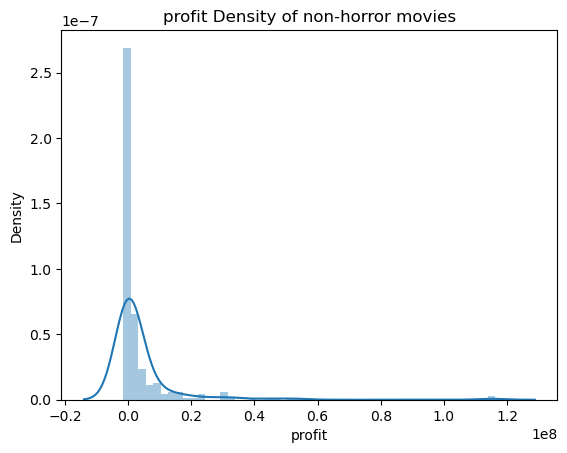

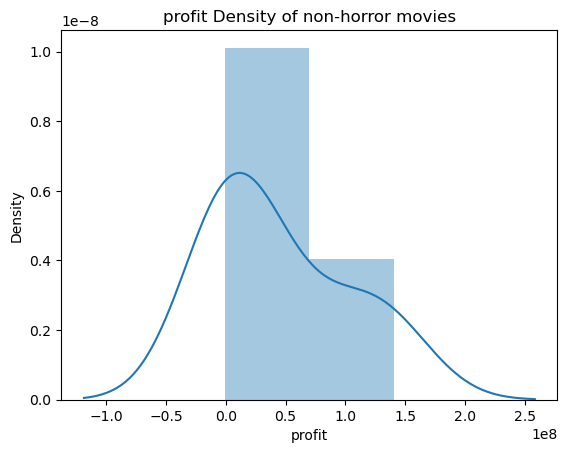

In [36]:
import warnings
warnings.filterwarnings("ignore") #to ignore the future warning of distribution plot
sns.distplot(df_final1['profit']).set(title='profit Density of non-horror movies') #for getting the distribution plot for 'profit'from genres other than horror
plt.show()
sns.distplot(df_final2['profit']).set(title='profit Density of non-horror movies')#for getting the distribution plot for 'profit' from Horror genre
plt.show()

In [37]:
def hypothesis_testing(data1,data2):
  alpha = [0.01, 0.05, 0.1] # common values for significance level
  from scipy.stats import ttest_ind
  stat,p_value = ttest_ind(data1,data2, equal_var= False)
  print(p_value/2) # since we are doing single tail test, we need only p_value/2
  for i in alpha:
    if p_value/2 < i:
      print('Reject the Null Hypothesis H0 at {} % significance level'.format(i*100))
      break
    else:
      print('Failed to reject the Null Hypothesis H0 at {} % significance level'.format(i*100))

In [38]:
hypothesis_testing(df_final2['profit'],df_final1['profit'])

0.05467453343638088
Failed to reject the Null Hypothesis H0 at 1.0 % significance level
Failed to reject the Null Hypothesis H0 at 5.0 % significance level
Reject the Null Hypothesis H0 at 10.0 % significance level


The results of the previous hypothesis test showed that, with a 90% confidence interval, the average box office revenue for other movie genres might be surpassed by the release of a horror film.

# Summary

To find out which movie genre should be released first in order to maximize profit within the allocated budget of 1.5 million, an exploratory analysis is conducted on the current data set. In order to remove unnecessary features, I first organised and cleaned the data set based on null values, and duplicate values and removed some non-required columns from the data set to make it more understandable. then, assessed the general relationship between the attributes. After more research, it was discovered that financial limitations prevented many popular genres from becoming accessible. it does not have more effect in the data set and after cleaning we settle with 75% of the data.

The top genres with the highest profit margins have been identified after further examination of the data. However, an examination based on such a small sample size is misleading as there aren't many films in several of these groups of movies. Movie genres with large sample sizes and high box office receipts were found to combat this. Among these genres of films, horror films are suggested because of their comparatively good return on investments based on top profitable movies and movies that come under the budget size. It has a decent IMDB rating.

Finally, I conducted with the hypothesis testing and discovered that I could suggest the Horror movie genre with a 90% confidence interval in the English language.